# Parametrization for the EoS of f(R) model

## Preamble

In [3]:
%pylab inline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


/anaconda/envs/CosmoConda36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

## Datos

Tenemos dos archvos, uno con el rango completo de redshifts (o factor de escala), y otro donde hemos cortado el rango hasta $0\leq z \leq 3$

In [6]:
#  columna 1: redshift (z) 
#  columna 2: factor de escala en unidades de hoy (a/a_hoy)
#  columna 3: w_X  (P_x / \rho_X)
#  columna 4: w_total  (P_total/ \rho_total)
#  columna 5: H/H_hoy

S1_data = np.loadtxt('./../../Input/weff-St-m20-l1-15-n2-Ro41666.dat')
S2_data = np.loadtxt('./../../Input/weff-St-m25-l1-n2-Ro41666.dat')
S3_data = np.loadtxt('./../../Input/weff-St-m30-l09-15-n2-Ro41666.dat')

S1=vectorize(S1_data)
S2=vectorize(S2_data)
S3=vectorize(S3_data)

z1 = S1_data[:,1]
z2 = S2_data[:,1]
z3 = S3_data[:,1]

wx1 = S1_data[:,2]
wx2 = S2_data[:,2]
wx3 = S3_data[:,2]



(8.9741824500000007, -0.99999927300000002)

Vamos a ver cómo se ven las ecuaciones de estado $w(z)$

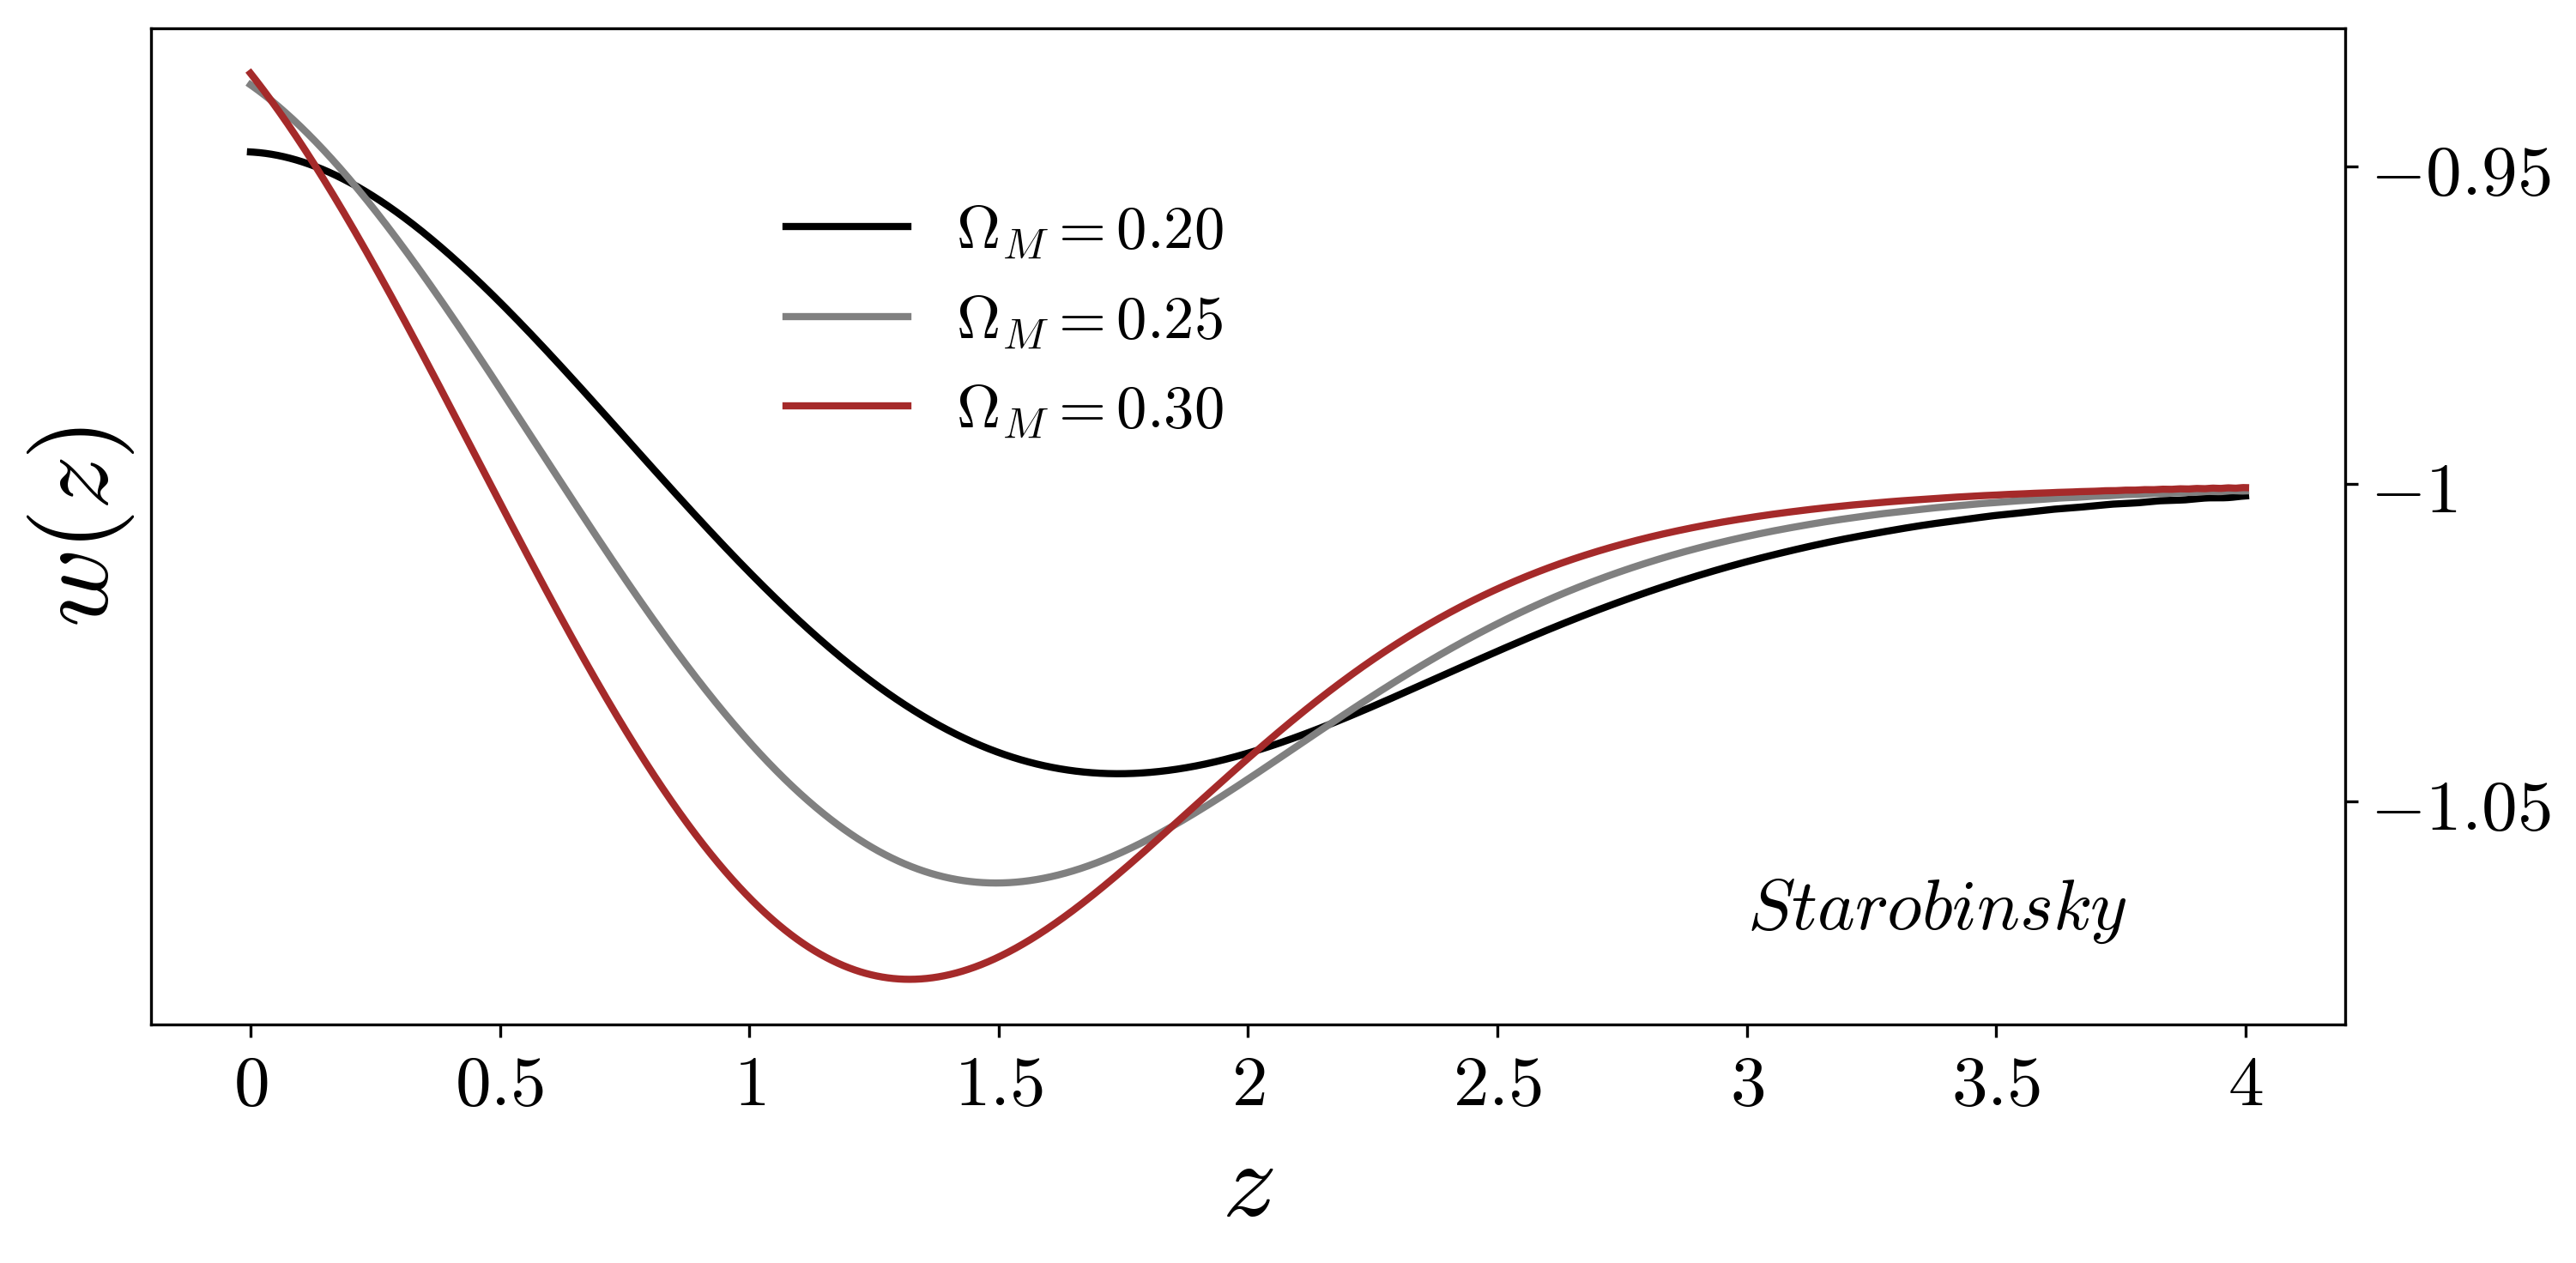

In [10]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()

plot(z1, wx1, ls='-', color="black", label = r'$\Omega_M = 0.20$')
plot(z2, wx2, ls='-', color="grey", label = r'$\Omega_M = 0.25$')
plot(z3, wx3, ls='-', color="brown", label = r'$\Omega_M = 0.30$')

#plot(frdata[:,0], frdata[:,3], ls='--', color="red", label = 'total')
plt.legend(bbox_to_anchor=(0.5, 0.85), loc='best', borderaxespad=0.,prop={'size':17}, frameon=False)
plt.text(3,-1.07, r'$Starobinsky$')


cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

#plt.xlim((0,3))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################


#savefig('./../../figures/St-3models.pdf',bbox_inches='tight')
#savefig('./../../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/St-3models.pdf',bbox_inches='tight')



### Fitting for the EoS


$w_{x, param}(z; \bar{w}_0, w_1, w_2, w_3) = -1 + \frac{\bar{w}_0}{1+w_1 z^{w_2}}cos(w_3+z)$


In [7]:
def parametrization(x, w0, w1, w2 ,w3):
    return -1 + (w0/(1+w1*x**w2))*cos(w3+x)

In [8]:
#zdata = np.linspace(0, 4, 13863)



popt1, pcov1 = curve_fit(parametrization, z1, wx1, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)
popt2, pcov2 = curve_fit(parametrization, z2, wx2, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)
popt3, pcov3 = curve_fit(parametrization, z3, wx3, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

popt1b, pcov1b = curve_fit(parametrization, z1, wx1, p0=(0.1,0.04,3,7), maxfev = 10000, ftol=9e-5, xtol=1e-3)
popt2b, pcov2b = curve_fit(parametrization, z2, wx2, p0=(0.1,0.04,3,7), maxfev = 10000, ftol=9e-5, xtol=1e-3)
popt3b, pcov3b = curve_fit(parametrization, z3, wx3, p0=(0.1,0.04,3,7), maxfev = 10000, ftol=9e-5, xtol=1e-3)

popt1, popt2, popt3, 'b', popt1b, popt2b, popt3b

(array([ 0.08421994,  0.26481688,  2.40612118,  7.07804504]),
 array([ 0.11455077,  0.06298176,  4.49645917,  7.23044979]),
 array([ 0.14505723,  0.10643274,  4.49182676,  7.37364357]),
 'b',
 array([ 0.07940911,  0.02751065,  4.66523162,  7.01820419]),
 array([ 0.11458748,  0.06345752,  4.49786082,  7.23056058]),
 array([ 0.14506427,  0.10649407,  4.49110358,  7.37365304]))

In [9]:
#values from mathematica fit using FindFit
# -1 + (w1St1 Cos[w2St1 + z])/(1 + w3St1 z^w4St1) << Luisa 
# -1 + (w0/(1+w1*x**w2))*cos(w3+x)

w1St1 = 0.07941432634335581; #w0
w2St1 = 0.7350481090743749; #w3
w3St1 = 0.027543454282700896; #w1
w4St1 = 4.664160288587016; #w2

w1St2 = 0.1145876934889121;
w2St2 = 0.9473759146761661;
w3St2 = 0.06345907415124843;
w4St2 = 4.49783363172351;

w1St3 = 0.14506585428311156;
w2St3 = 1.0904696625936021;
w3St3 = 0.10650704227219877;
w4St3 = 4.4909420316351065;


p1 = [w1St1, w3St1, w4St1, w2St1];
p2 = [w1St2, w3St2, w4St2, w2St2];
p3 = [w1St3, w3St3, w4St3, w2St3];

In [27]:
amax(pcov1)/amax(pcov1b), amax(pcov2)/amax(pcov2b),amax(pcov3)/amax(pcov3b)

perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))

perr1b = np.sqrt(np.diag(pcov1b))
perr2b = np.sqrt(np.diag(pcov2b))
perr3b = np.sqrt(np.diag(pcov3b))

amax(perr1)/amax(perr1b), amax(perr2)/amax(perr2b),amax(perr3)/amax(perr3b)

(1.9687244079774999, 0.9694626872282881, 0.99859420162812218)

(0.99, 1.005)

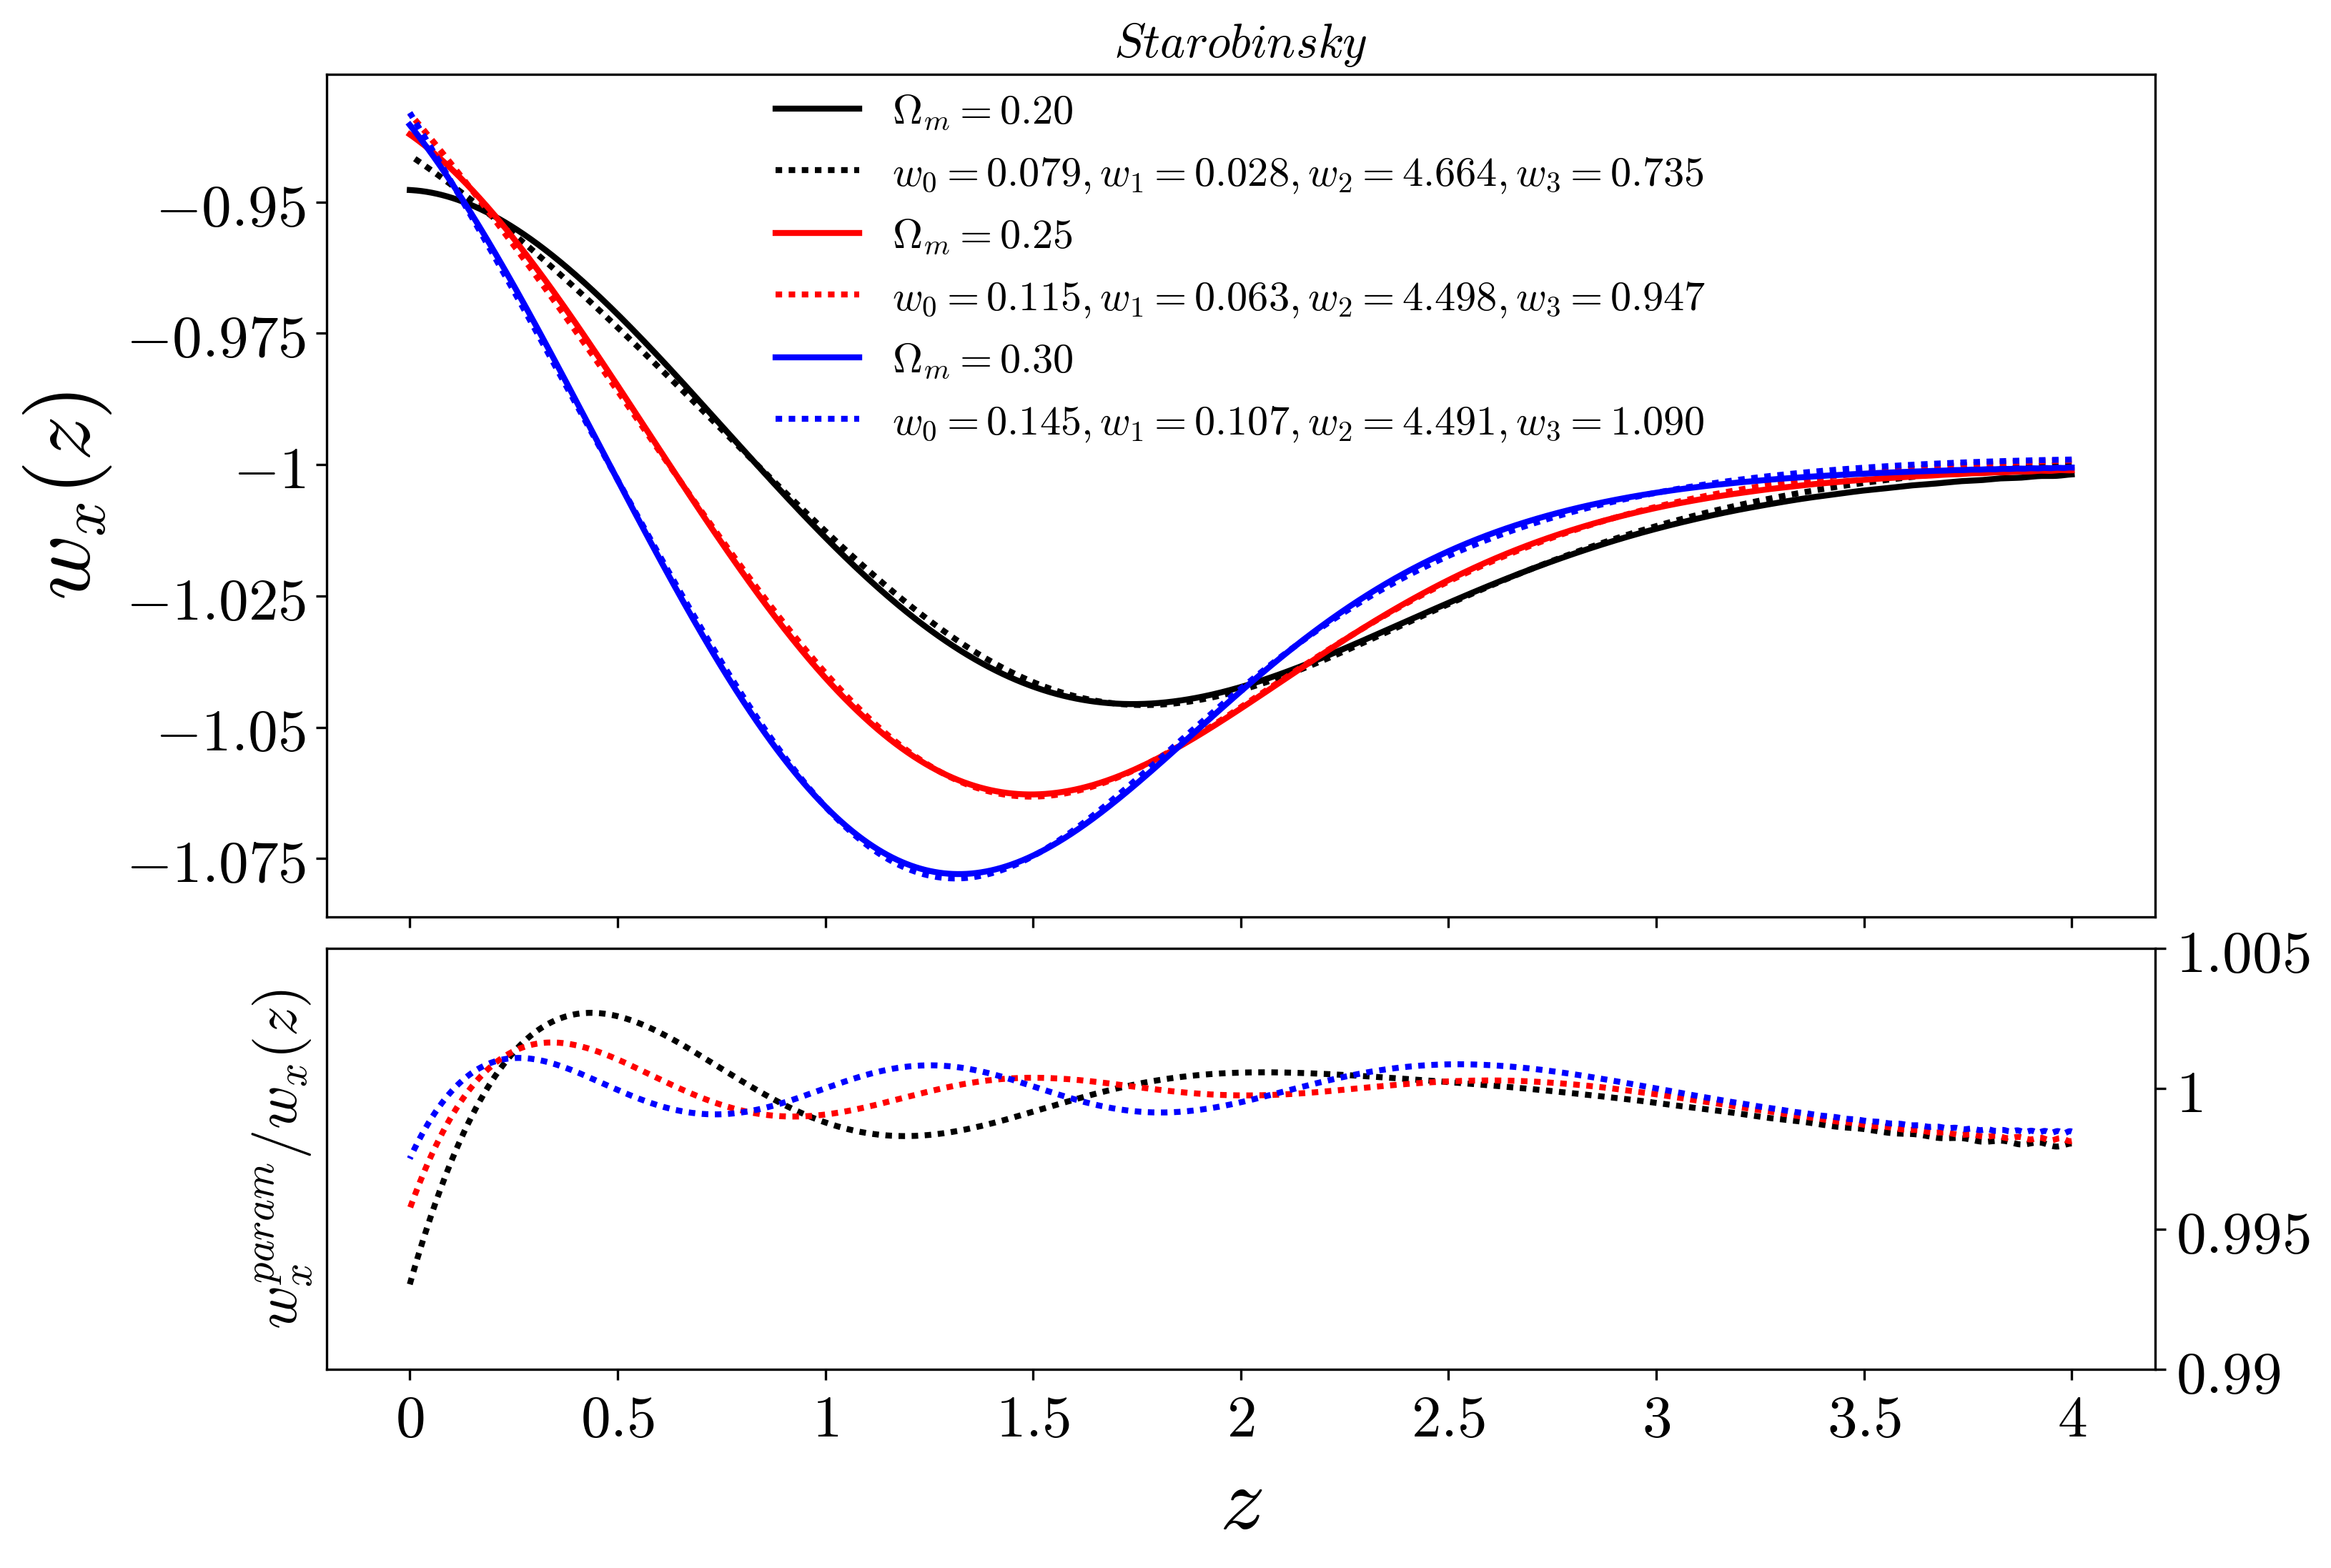

In [15]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'
fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

subplot(grid_spec[0])
cax = gca()

y1best = parametrization(z1, *popt1)
y2best = parametrization(z2, *popt2)
y3best = parametrization(z3, *popt3)

y1bestb = parametrization(z1, *popt1b)
y2bestb = parametrization(z2, *popt2b)
y3bestb = parametrization(z3, *popt3b)

y1bestm = parametrization(z1, *p1)
y2bestm = parametrization(z2, *p2)
y3bestm = parametrization(z3, *p3)


plot(z1, wx1, color='black', label=r'$\Omega_m=0.20$ ')
plot(z1, y1bestm, color = 'black', ls=':', 
     label=r'$w_0=%5.3f, w_1=%5.3f, w_2=%5.3f, w_3=%5.3f$' % tuple(p1))
plot(z2, wx2, color='red', label=r'$\Omega_m=0.25$ ')

plot(z2, y2bestm, color = 'red', ls=':',
     label=r'$w_0=%5.3f, w_1=%5.3f, w_2=%5.3f, w_3=%5.3f$' % tuple(p2))

plot(z3, wx3, color='blue', label=r'$\Omega_m=0.30$ ')
plot(z3, y3bestm, color = 'blue', ls=':', 
     label=r'$w_0=%5.3f, w_1=%5.3f, w_2=%5.3f, w_3=%5.3f$' % tuple(p3))


plt.title(r'$Starobinsky$', size=16)
#= $-1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3 x)$
plt.legend(
    #bbox_to_anchor=(0.45, 0.55), 
    loc='best', borderaxespad=0.,prop={'size':14}, frameon=False)



cax.yaxis.set_ticks_position('left') 
cax.yaxis.set_major_formatter(FancyFormatter())
#xlabel(r'$z$', fontsize=30)
ylabel(r'$w_x(z)$', fontsize=30)

cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

cax.xaxis.set_ticklabels([], minor=True)
cax.xaxis.set_ticklabels([])

#################### Empty subplot  #####################

subplot(grid_spec[1])
cax2 = gca()
xlabel(r'$z$', fontsize=30)
cax2.xaxis.set_major_formatter(FancyFormatter())

plot(z1, y1bestm/wx1, label = '1', color='black', ls=':')
plot(z2, y2bestm/wx2, label = '2', color='red', ls=':')
plot(z3, y3bestm/wx3, label = '3', color='blue', ls=':')

ylabel(r'$w_{x}^{param}/w_{x}(z)$', fontsize=20)
cax2.yaxis.set_ticks_position('right') 
cax2.yaxis.set_major_formatter(FancyFormatter())

cax2.set_ylim(0.99,1.005)

#savefig('./../../figures/fits_St-3models-ratio-mathem.pdf',bbox_inches='tight')
#savefig('./../../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/fits_St-3models-ratio-mathem.pdf',bbox_inches='tight')





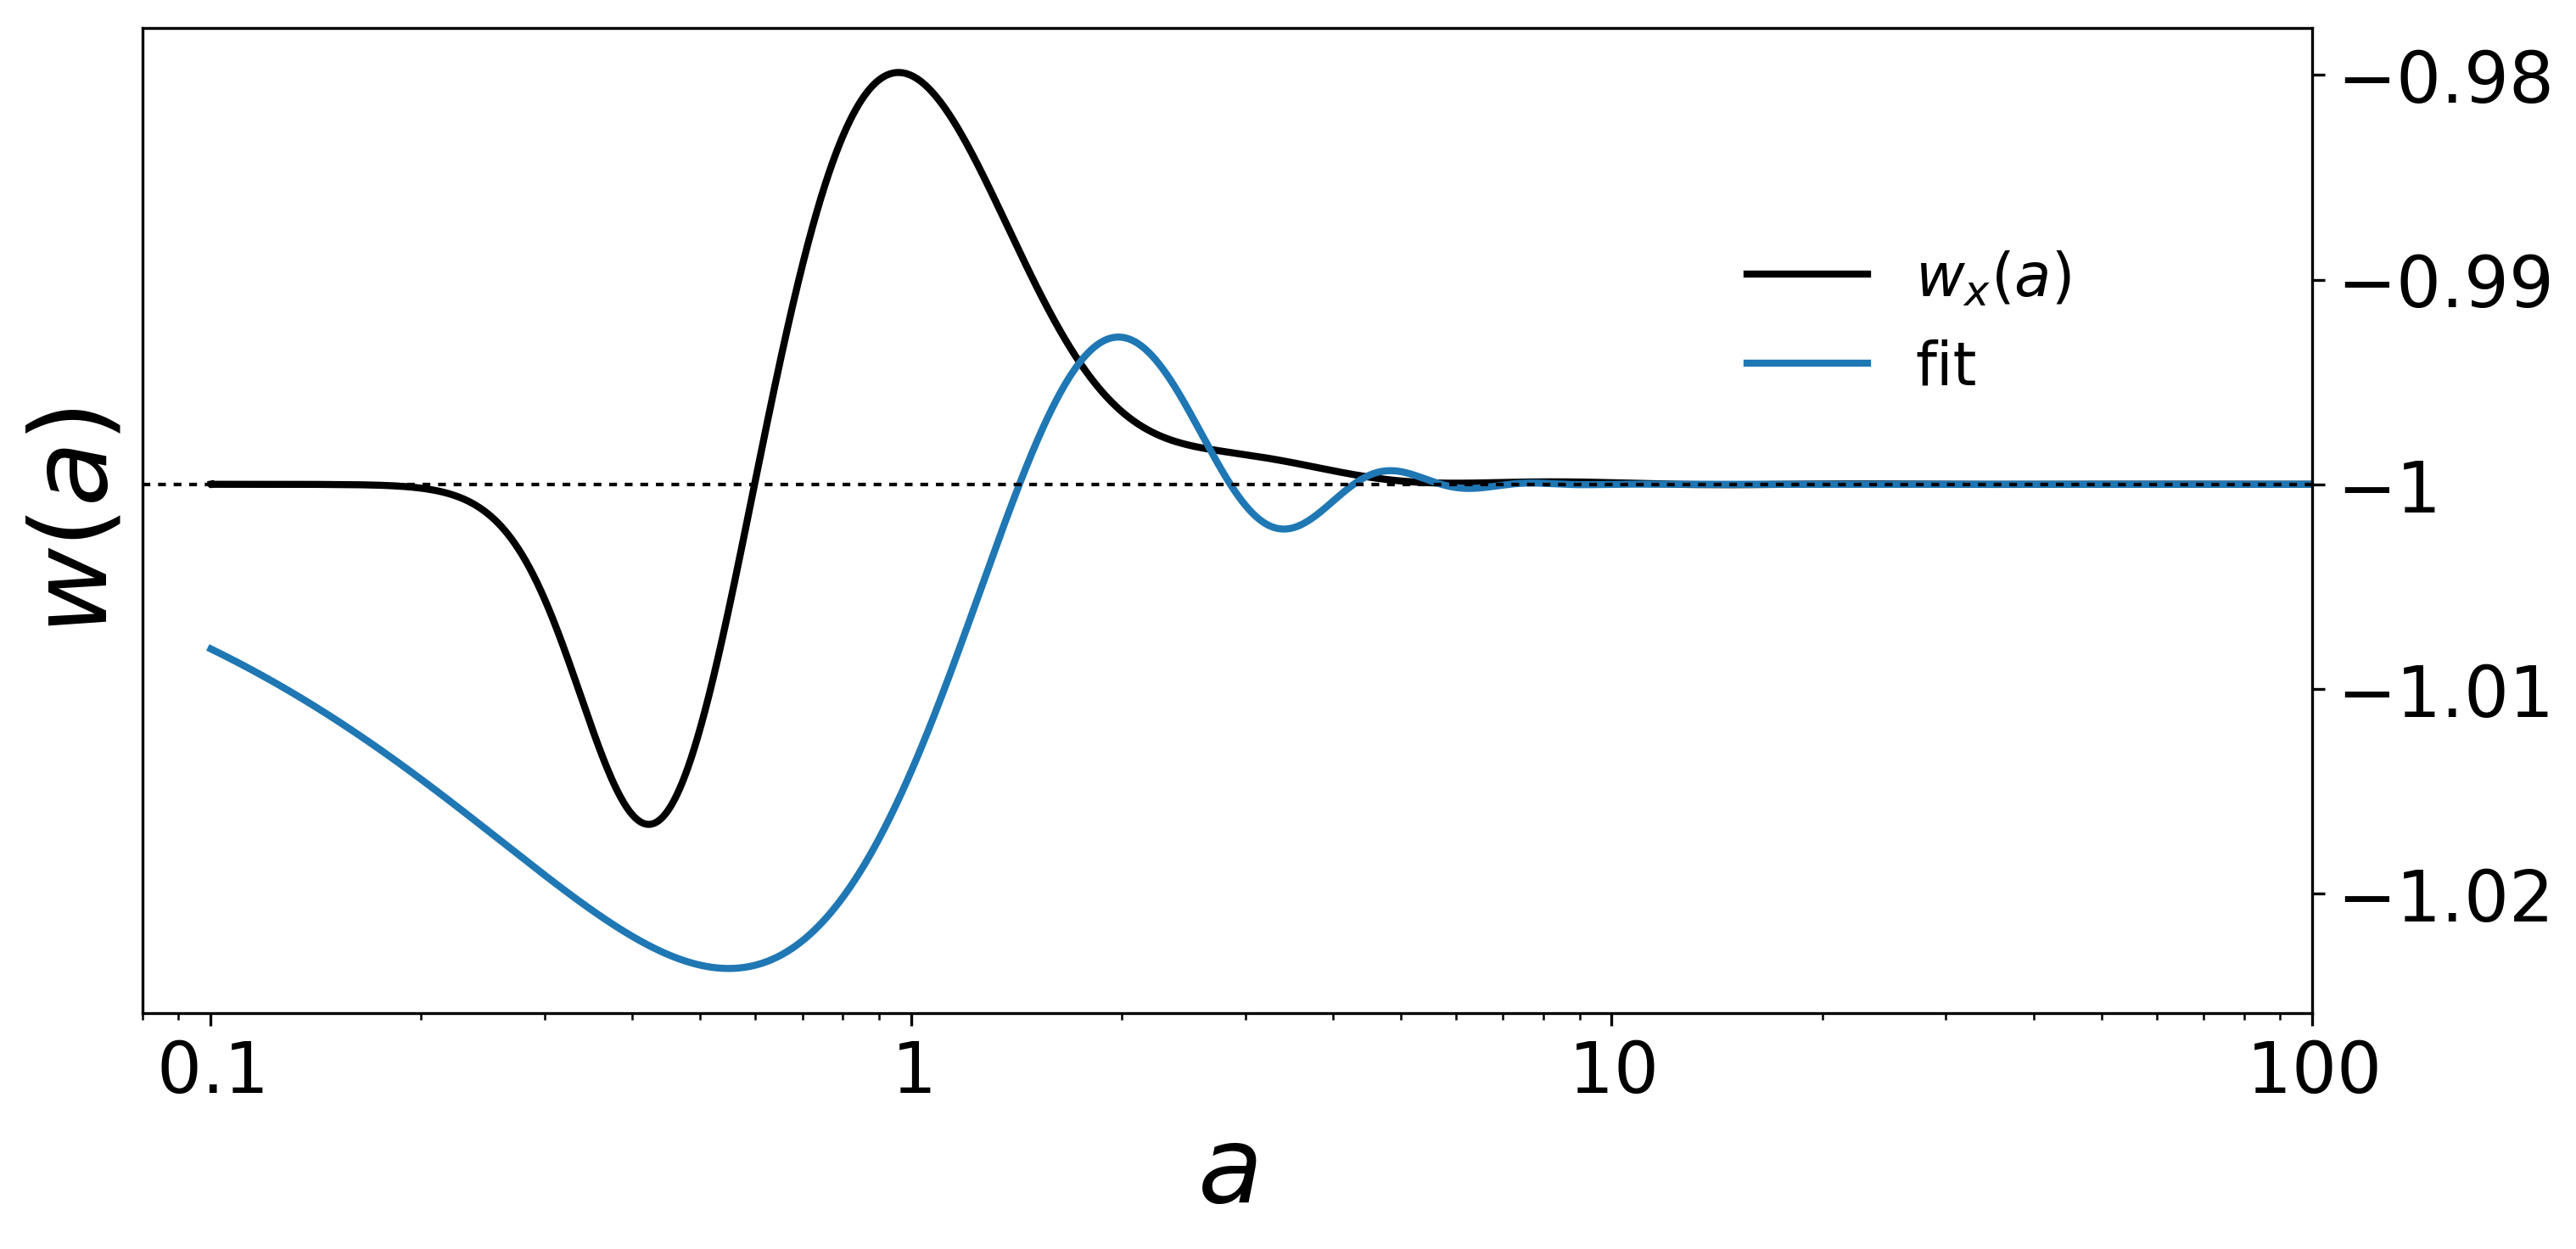